In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.over_sampling import BorderlineSMOTE

In [2]:
# Custom scikit-learn like pipeline with additional functionalities
import pipeline as pl

In [3]:
# How the pipeline should be run for this project
from model.AdData import *
from model.AdFeatures import *
from model.AdClassify import TestPerformance

In [4]:
# Utilities
from model import hyperparams
from model import plotlib

### Initialize

In [5]:
plotlib.load_fonts("../../../common/fonts/")
plt.style.use("matplotlib.mplstyle")

In [6]:
inputCsv = "../Data/imputed_data.mice.csv"
ignoreXCols = ['imp', 'id', 'quality', 'lobe', 'full', 'other', 'coatingId']

In [7]:
loader = LoadData(inputCsv)
loader.Execute(None)

 -- LoadData() ... 
	 Test IDs: [16, 15, 17, 7, 14, 22]
	 Test classes: ['full', 'other', 'other', 'lobe', 'full', 'full']
	 Performed train/test split.



Tr shape: (136, 22)
Tr columns: Index(['imp', 'id', 'tspk1', 'tsfw1', 'lspk1', 'lsfw1', 'tspk2', 'tsfw2',
       'lspk2', 'lsfw2', 'tspk3', 'tsfw3', 'lspk3', 'lsfw3', 'teosVolume',
       'teosVolPct', 'quality', 'lobe', 'full', 'other', 'coating',
       'coatingId'],
      dtype='object')
Ts shape: (6, 22)
Ts columns: Index(['imp', 'id', 'tspk1', 'tsfw1', 'lspk1', 'lsfw1', 'tspk2', 'tsfw2',
       'lspk2', 'lsfw2', 'tspk3', 'tsfw3', 'lspk3', 'lsfw3', 'teosVolume',
       'teosVolPct', 'quality', 'lobe', 'full', 'other', 'coating',
       'coatingId'],
      dtype='object')
xCols: []

In [8]:
selYCols = ['lspk3', 'tspk3', 'lsfw3', 'tsfw3']
selXCol = 'full'

# Random Over Sampling

Initialized 1 pipelines.
Pipeline 01 of 01:
================================================ >>
 -- LoadData() ... ok
 -- ImputedData() ... ok
 -- SetYCol: coating ... 'coating' ok
 -- AllValidFeatures() ... 
	 Selected 15 features.

 -- AugmentImb: RandomOverSampler ... 
	 Old shape: (120, 22), New shape: (240, 22)

 -- PlotPerturbation() ... 

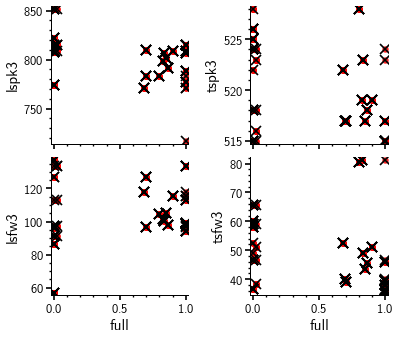

ok
 -- PlotFrequency() ... 

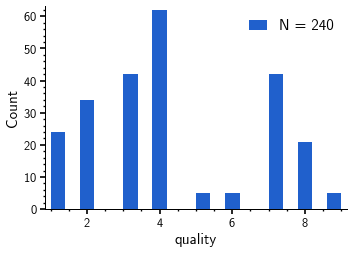

ok
 -- PlotCount() ... 

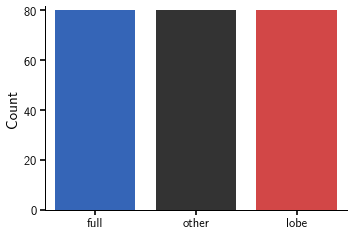

ok
Done 01.



In [9]:
grid = [
    loader,
    ImputedData(),
    pl.SetYCol('coating'),
    (
        pl.AllValidFeatures(ignoreCols=ignoreXCols),
    ),
    (
        pl.AugmentImb(RandomOverSampler()),
    ),
    pl.PlotPerturbation(loader.traindf, selXCol, selYCols,
                        saveAs='../Plots/x12_perturb2x2_ROS.png'),
    pl.PlotFrequency('quality', saveAs='../Plots/x12_frequency_ROS.png'),
    pl.PlotCount('coating', saveAs='../Plots/x12_count_ROS.png')
]

pipe = pipeline.GridLine(grid)
pipe.Execute(inputCsv)

Initialized 1 pipelines.
Pipeline 01 of 01:
================================================ >>
 -- LoadData() ... ok
 -- ImputedData() ... ok
 -- SetYCol: coating ... 'coating' ok
 -- AllValidFeatures() ... 
	 Selected 15 features.

 -- AugmentImb: BorderlineSMOTE ... 
	 Old shape: (120, 22), New shape: (240, 22)

 -- PlotPerturbation() ... 

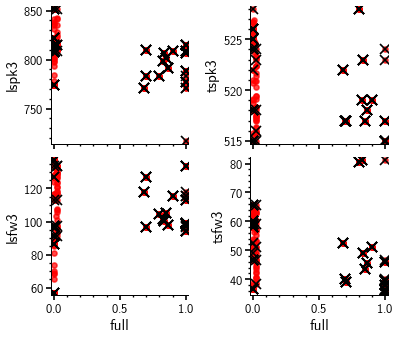

ok
 -- PlotFrequency() ... 

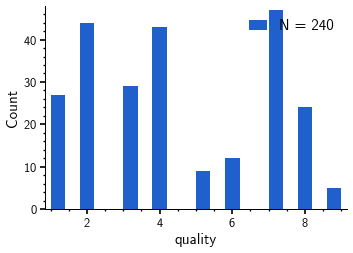

ok
 -- PlotCount() ... 

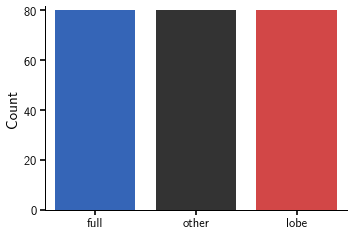

ok
Done 01.



In [10]:
grid = [
    loader,
    ImputedData(),
    pl.SetYCol('coating'),
    (
        pl.AllValidFeatures(ignoreCols=ignoreXCols),
    ),
    (
        pl.AugmentImb(BorderlineSMOTE()),
    ),
    pl.PlotPerturbation(loader.traindf, selXCol, selYCols,
                        saveAs='../Plots/x12_perturb2x2_BLSMOTE.png'),
    pl.PlotFrequency('quality', saveAs='../Plots/x12_frequency_BLSMOTE.png'),
    pl.PlotCount('coating', saveAs='../Plots/x12_count_BLSMOTE.png')

]

pipe = pipeline.GridLine(grid)
pipe.Execute(inputCsv)

Initialized 1 pipelines.
Pipeline 01 of 01:
================================================ >>
 -- LoadData() ... ok
 -- ImputedData() ... ok
 -- SetYCol: coating ... 'coating' ok
 -- AllValidFeatures() ... 
	 Selected 15 features.

 -- AugmentImb: SMOTE ... 
	 Old shape: (120, 22), New shape: (240, 22)

 -- PlotPerturbation() ... 

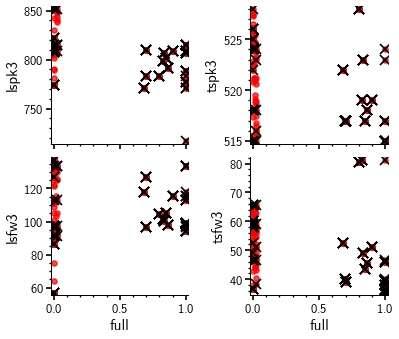

ok
 -- PlotFrequency() ... 

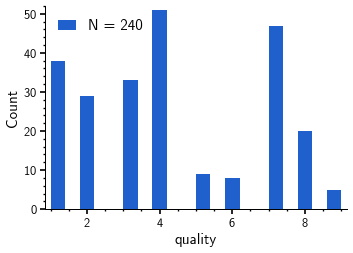

ok
 -- PlotCount() ... 

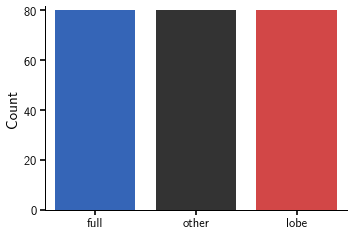

ok
Done 01.



In [11]:
grid = [
    loader,
    ImputedData(),
    pl.SetYCol('coating'),
    (
        pl.AllValidFeatures(ignoreCols=ignoreXCols),
    ),
    (
        pl.AugmentImb(SMOTE()),
    ),
    pl.PlotPerturbation(loader.traindf, selXCol, selYCols,
                        saveAs='../Plots/x12_perturb2x2_SMOTE.png'),
    pl.PlotFrequency('quality', saveAs='../Plots/x12_frequency_SMOTE.png'),
    pl.PlotCount('coating', saveAs='../Plots/x12_count_SMOTE.png')
]

pipe = pipeline.GridLine(grid)
pipe.Execute(inputCsv)

Initialized 1 pipelines.
Pipeline 01 of 01:
================================================ >>
 -- LoadData() ... ok
 -- ImputedData() ... ok
 -- SetYCol: coating ... 'coating' ok
 -- AllValidFeatures() ... 
	 Selected 15 features.

 -- AugmentImb: ADASYN ... 
	 Old shape: (120, 22), New shape: (246, 22)

 -- PlotPerturbation() ... 

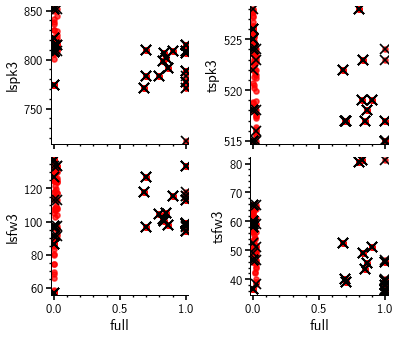

ok
 -- PlotFrequency() ... 

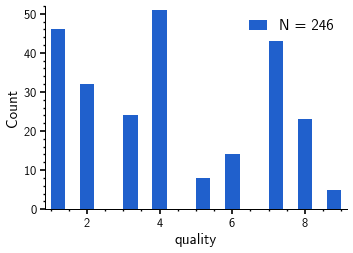

ok
 -- PlotCount() ... 

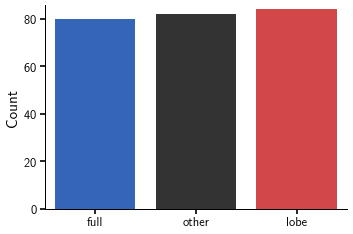

ok
Done 01.



In [12]:
grid = [
    loader,
    ImputedData(),
    pl.SetYCol('coating'),
    (
        pl.AllValidFeatures(ignoreCols=ignoreXCols),
    ),
    (
        pl.AugmentImb(ADASYN()),
    ),
    pl.PlotPerturbation(loader.traindf, selXCol, selYCols,
                        saveAs='../Plots/x12_perturb2x2_ADASYN.png'),
    pl.PlotFrequency('quality', saveAs='../Plots/x12_frequency_ADASYN.png'),
    pl.PlotCount('coating', saveAs='../Plots/x12_count_ADASYN.png')

]

pipe = pipeline.GridLine(grid)
pipe.Execute(inputCsv)

Initialized 1 pipelines.
Pipeline 01 of 01:
================================================ >>
 -- LoadData() ... ok
 -- ImputedData() ... ok
 -- SetYCol: coatingId ... 'coatingId' ok
 -- DropCol: coating ... ok
 -- AllValidFeatures() ... 
	 Selected 14 features.

 -- AugmentByQuality: F=1 scale=0.30 ... 
	 Old shape: (120, 21), New shape: (175, 21)

 -- PlotPerturbation() ... 

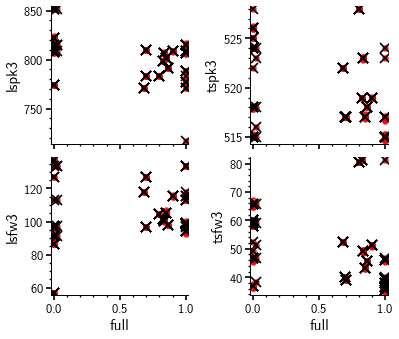

ok
 -- PlotFrequency() ... 

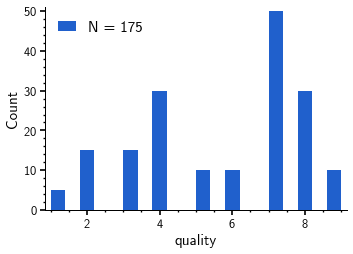

ok
 -- PlotCount() ... 

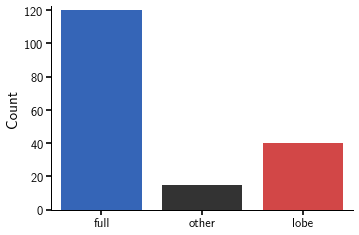

ok
Done 01.



In [13]:
grid = [
    loader,
    ImputedData(),
    pl.SetYCol('coatingId'),
    pl.DropCol('coating'),
    (
        pl.AllValidFeatures(ignoreCols=ignoreXCols),
    ),
    (
        pl.AugmentByQuality(F=1, scale=0.3, qcol='quality'),
    ),
    pl.PlotPerturbation(loader.traindf, selXCol, selYCols,
                        saveAs='../Plots/x12_perturb2x2_Qual_1_0.3.png'),
    pl.PlotFrequency('quality', saveAs='../Plots/x12_frequency_Qual_1_0.3.png'),
    pl.PlotCount('coatingId', xtickLabels=loader.labels, saveAs='../Plots/x12_count_Qual_1_0.3.png')
]

pipe = pipeline.GridLine(grid)
pipe.Execute(inputCsv)

Initialized 1 pipelines.
Pipeline 01 of 01:
================================================ >>
 -- LoadData() ... ok
 -- ImputedData() ... ok
 -- SetYCol: coatingId ... 'coatingId' ok
 -- DropCol: coating ... ok
 -- AllValidFeatures() ... 
	 Selected 14 features.

 -- AugmentByQuality: F=2 scale=0.30 ... 
	 Old shape: (120, 21), New shape: (770, 21)

 -- PlotPerturbation() ... 

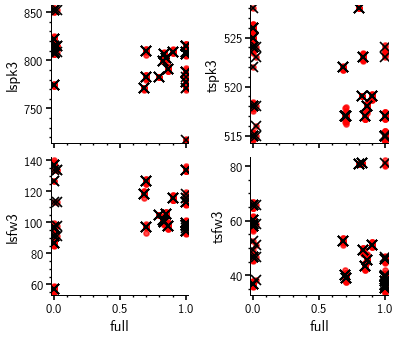

ok
 -- PlotFrequency() ... 

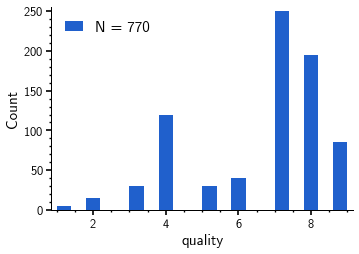

ok
 -- PlotCount() ... 

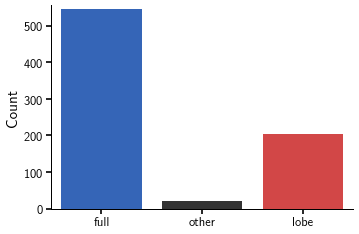

ok
Done 01.



In [14]:
grid = [
    loader,
    ImputedData(),
    pl.SetYCol('coatingId'),
    pl.DropCol('coating'),
    (
        pl.AllValidFeatures(ignoreCols=ignoreXCols),
    ),
    (
        pl.AugmentByQuality(F=2, scale=0.3, qcol='quality'),
    ),
    pl.PlotPerturbation(loader.traindf, selXCol, selYCols,
                        saveAs='../Plots/x12_perturb2x2_Qual_2_0.3.png'),
    pl.PlotFrequency('quality', saveAs='../Plots/x12_frequency_Qual_2_0.3.png'),
    pl.PlotCount('coatingId', xtickLabels=loader.labels, saveAs='../Plots/x12_count_Qual_2_0.3.png')

]

pipe = pipeline.GridLine(grid)
pipe.Execute(inputCsv)

Initialized 1 pipelines.
Pipeline 01 of 01:
================================================ >>
 -- LoadData() ... ok
 -- ImputedData() ... ok
 -- SetYCol: coatingId ... 'coatingId' ok
 -- DropCol: coating ... ok
 -- AllValidFeatures() ... 
	 Selected 14 features.

 -- AugmentByQuality: F=1 scale=0.60 ... 
	 Old shape: (120, 21), New shape: (175, 21)

 -- PlotPerturbation() ... 

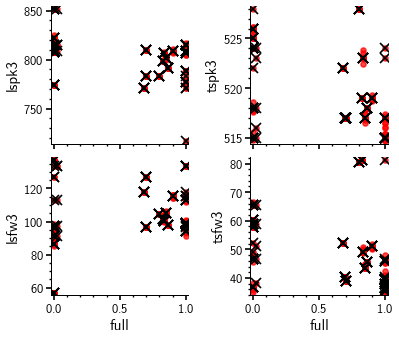

ok
 -- PlotFrequency() ... 

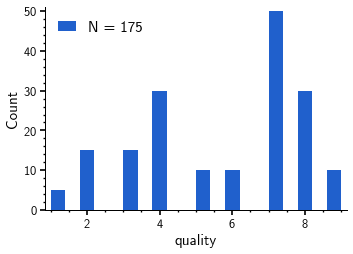

ok
 -- PlotCount() ... 

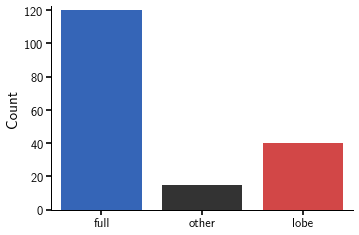

ok
Done 01.



In [15]:
grid = [
    loader,
    ImputedData(),
    pl.SetYCol('coatingId'),
    pl.DropCol('coating'),
    (
        pl.AllValidFeatures(ignoreCols=ignoreXCols),
    ),
    (
        pl.AugmentByQuality(F=1, scale=0.6, qcol='quality'),
    ),
    pl.PlotPerturbation(loader.traindf, selXCol, selYCols,
                        saveAs='../Plots/x12_perturb2x2_Qual_1_0.6.png'),
    pl.PlotFrequency('quality', saveAs='../Plots/x12_frequency_Qual_1_0.6.png'),
    pl.PlotCount('coatingId', xtickLabels=loader.labels, saveAs='../Plots/x12_count_Qual_1_0.6.png')

]

pipe = pipeline.GridLine(grid)
pipe.Execute(inputCsv)

Initialized 1 pipelines.
Pipeline 01 of 01:
================================================ >>
 -- LoadData() ... ok
 -- ImputedData() ... ok
 -- SetYCol: coatingId ... 'coatingId' ok
 -- DropCol: coating ... ok
 -- AllValidFeatures() ... 
	 Selected 14 features.

 -- AugmentByQuality: F=2 scale=0.60 ... 
	 Old shape: (120, 21), New shape: (770, 21)

 -- PlotPerturbation() ... 

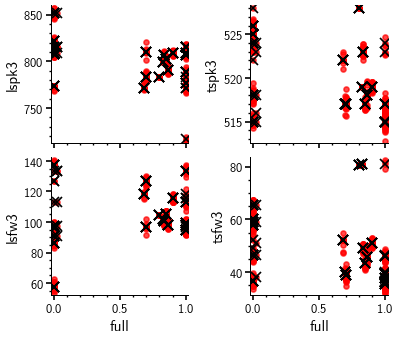

ok
 -- PlotFrequency() ... 

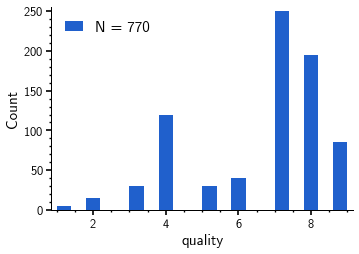

ok
 -- PlotCount() ... 

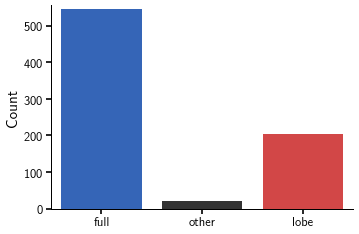

ok
Done 01.



In [16]:
grid = [
    loader,
    ImputedData(),
    pl.SetYCol('coatingId'),
    pl.DropCol('coating'),
    (
        pl.AllValidFeatures(ignoreCols=ignoreXCols),
    ),
    (
        pl.AugmentByQuality(F=2, scale=0.6, qcol='quality'),
    ),
    pl.PlotPerturbation(loader.traindf, selXCol, selYCols,
                        saveAs='../Plots/x12_perturb2x2_Qual_2_0.6.png'),
    pl.PlotFrequency('quality', saveAs='../Plots/x12_frequency_Qual_2_0.6.png'),
    pl.PlotCount('coatingId', xtickLabels=loader.labels, saveAs='../Plots/x12_count_Qual_2_0.6.png')
]

pipe = pipeline.GridLine(grid)
pipe.Execute(inputCsv)